In [27]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
import collections 
from random import randrange
samples,labels = load_wine(return_X_y = True)

## Standardization of Data

In [5]:
#1. Centered Data
mean_vec = samples.mean(axis=1)
mean_vec = np.tile(mean_vec.reshape(samples.shape[0],1),[1,samples.shape[1]])
samples_centered = samples-mean_vec

Text(0.5,1,'2D Features of Centralized Principal Components')

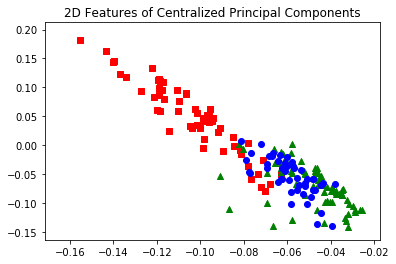

In [7]:
#2. Two-Dimensional PCA 

#Singular Value Decomposition
u_centered,s_centered,v_centered = np.linalg.svd(samples_centered,True)
features_centered = u_centered[:,0:2]
pca_centered = features_centered.T

#Labels Scatter Plot
plt.scatter(pca_centered.T[np.where(labels==0),0],pca_centered.T[np.where(labels==0),1],c='r',marker='s')
plt.scatter(pca_centered.T[np.where(labels==1),0],pca_centered.T[np.where(labels==1),1],c='g',marker='^')
plt.scatter(pca_centered.T[np.where(labels==2),0],pca_centered.T[np.where(labels==2),1],c='b',marker='o')

plt.title('2D Features of Centralized Principal Components')

In [8]:
#3. Normalized Data
maximum = np.max(samples_centered)
minimum = np.min(samples_centered)
norm = np.subtract(samples_centered,minimum)
diff = np.subtract(maximum,minimum)
samples_normalized = np.divide(norm,diff)

Text(0.5,1,'2D Features')

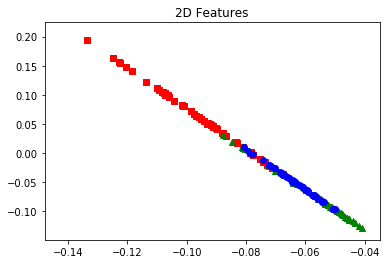

In [9]:
#4. Two Dimensional PCA

#Singular Value Decomposition
u_normalized,s_normalized,v_normalized = np.linalg.svd(samples_normalized,True)
features_normalized = u_normalized[:,0:2]
pca_normalized = features_normalized.T

plt.scatter(pca_normalized.T[np.where(labels==0),0],pca_normalized.T[np.where(labels==0),1],c='r',marker='s')
plt.scatter(pca_normalized.T[np.where(labels==1),0],pca_normalized.T[np.where(labels==1),1],c='g',marker='^')
plt.scatter(pca_normalized.T[np.where(labels==2),0],pca_normalized.T[np.where(labels==2),1],c='b',marker='o')
plt.title('2D Features')

5. The centered and normalized data seems to have better PCA performance. 

 ## Naive Bayes Classification

In [42]:
#function to calculate prior probability of data points
def PriorProbability(labels):
    prior = collections.Counter(labels)
    for key in prior.keys():
        prior[key] = prior[key]/len(labels)
    return prior

print(PriorProbability(labels))

Counter({1: 0.398876404494382, 0: 0.33146067415730335, 2: 0.2696629213483146})


In [90]:
def naiveBayes(labels,training,test):
    categories     = np.unique(labels)
    probabilities = {}
    
    for ctg in categories:
        probabilities[ctg] = collections.defaultdict(list)

    labelProbabilities = PriorProbability(labels)
    
    results = {}
    for ctg in categories:
        label_probability = labelProbabilities[ctg]
        for i in range(0,len(test)):
            relative_values = probabilities[ctg][i]
            if test[i] in relative_values:
                    label_probability = label_probability * relative_values[test[i]]
            results[ctg] = label_probability
    return(results)


#training = pca_centered.T
#new_sample = np.asarray([ -0.07495661 -0.07357057])
#naiveBayes(labels, training, new_sample)

    

{0: 0.33146067415730335, 1: 0.398876404494382, 2: 0.2696629213483146}

In [129]:
#Split data into k folds
def k_fold_CV(samples,folds):
    split = list()
    samples_split = list(dataset)
    fold_size = int(len(dataset)/folds)
    for i in range(folds):
        fold = list()
        while(len(fold) < fold_size):
            index = randrange(len(samples_split))
            fold.append(samples_split.pop(index))
        split.append(fold)
        return split

In [130]:
#k fold on centered data only
training1 = k_fold_cross_validation_split(pca_centered.T,5)
mean1 = np.mean(training1)
std1 = np.std(training1)
print("Centered Data Mean/Standard Deviation:")
print(mean1)
print(std1)

#k fold on standardized data
training2 = k_fold_cross_validation_split(pca_normalized.T,5)
mean2 = np.mean(training2)
std2 = np.std(training2)
print("Normalized Data Mean/Standard Deviation:")
print(mean2)
print(std2)

Centered Data Mean/Standard Deviation:
-0.04446652753291019
0.0608650140079587
Normalized Data Mean/Standard Deviation:
-0.04275886264766747
0.06368062869613834


In [131]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(pca_normalized.T,labels)
training3 = clf.predict(pca_normalized.T)
mean3 = np.mean(training3)
std3 = np.std(training3)
print("(SKlearn Normalized Data Mean/Standard Deviation:")
print(mean3)
print(std3)

(SKlearn Normalized Data Mean/Standard Deviation:
0.9438202247191011
0.7983065019474881


Out of the three cases, case 3 seems to have the most accurate mean/standard deviation. 